In [3]:
k = [1,2,3]
z = 2
[item for item in k if item != z]

[1, 3]

## import local

if no test dataset:
    train,test    =split
 = Balance(train)

clf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

bagging n boost = True

sklearn.calibration.
clf_cal = CalibratedClassifierCV(cv_clf,cv=prefit, cv = k)   resulting in k**2

2 modes for kaggle
1. train,train-valid, train-test using split-train_test
    ratio = .2 verify model against train dataset
2. train,train-valid, test using split-train_test 
   create model from bigger trainset, using ratio = 0.2.0,1 etce
use clf_cal. predict on test


In [1]:
!conda list

# packages in environment at /Users/brucecottman/anaconda3/envs/paso:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
absl-py                   0.7.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.6                    py37_0  
anaconda-project          0.8.2                    py37_0  
ansimarkup                1.4.0                    pypi_0    pypi
appnope                   0.1.0                    py37_0  
appscript                 1.0.1            py37h1de35cc_1  
asn1crypto                0.24.0                   py37_0  
astor                     0.7.1                    pypi_0    pypi
astroid                   2.1.0                    py37_0  
astropy                   3.1              py37h1de35cc_0  
atomicwrites              1.2.1                    py37_0  
att

In [3]:
from __future__ import print_function
__file__ = !cd .. ;pwd
__file__ = __file__[0]
__file__

'/Users/brucecottman/Documents/PROJECTS/paso'

In [6]:
import sys
from random import random
import pandas as pd
from tqdm import tqdm

sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/lessons',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [8]:
from loguru import logger

In [7]:
from paso.base import Paso,Log,PasoError,Param,NameToClass
from paso.pre.inputers import Inputer,Splitter
from paso.pre.cleaners import Class_Balance
from paso.pre.cleaners import Augment_by_Class
from paso.learners.learners import Learner
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

ModuleNotFoundError: No module named 'paso.base'

In [5]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import warnings
warnings.filterwarnings("ignore")
import multiprocessing

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(6,4)})
from paso.base import Paso,Log,PasoError
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 7.8.2019 09:56:49 INFO ========================================
paso 7.8.2019 09:56:49 INFO Read in parameter file: ../parameters/lesson.3.yaml


## Non-trivial class imbalanced dataset- Otto_Group

Let us rebalance and augment a larger dataset. [You can get ``otto_group``here.](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). In this dataset we have about 62,000 rows and 8 different classes.

In [6]:
inputer = Inputer(ontological_filepath='../ontologies/pre/inputers/otto_group.yaml')
otto_group = inputer.transform()
DataFrameSummary(otto_group).summary()

paso 7.8.2019 09:56:49 INFO Loaded Ontological file:../ontologies/pre/inputers/otto_group.yaml 


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878,61878,61878,61878,61878,61878,61878,61878,61878,61878,...,61878,61878,61878,61878,61878,61878,61878,61878,61878,NaN
mean,30939.5,0.38668,0.263066,0.901467,0.779081,0.071043,0.0256957,0.193704,0.662433,1.0113,...,0.532306,1.12858,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,NaN
std,17862.8,1.52533,1.25207,2.93482,2.788,0.438902,0.215333,1.0301,2.25577,3.47482,...,1.90044,2.68155,1.57545,2.11547,1.52738,4.5978,2.04565,0.982385,1.20172,NaN
min,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
25%,15470.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
50%,30939.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
75%,46408.8,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,NaN
max,61878,61,51,64,70,19,10,38,76,43,...,55,65,67,30,61,130,52,19,87,NaN
counts,61878,61878,61878,61878,61878,61878,61878,61878,61878,61878,...,61878,61878,61878,61878,61878,61878,61878,61878,61878,61878
uniques,61878,42,37,48,59,15,9,30,55,40,...,42,52,49,31,37,91,50,19,43,9


### A comment on unbalanced class datasets

We have been implicitly assuming that unbalanced class datasets are "bad". Why?  We know the more training data a learner has, the better it will predict the test data.  This is because the train data more we feed the learner then the more samples it has of the underlying population distribution.  We assume (or our learner will not predict very well) that test data is drawn from the same population.  More train data samples mean the underlying population is better understood.

Class unbalanced is better "characterized" as "unfair" or "biased". We have more training data for the majority classes and thus are less uncertain when making a prediction on that class.  We balance class datasets so the minority classes have an equal number of training samples,

### Showing unbalanced class dataset Otto_Group

The ``otto_group_train`` has a few majority classes (1,5) and minority classes(0,3,4,6).It is an class unbalanced dataset.

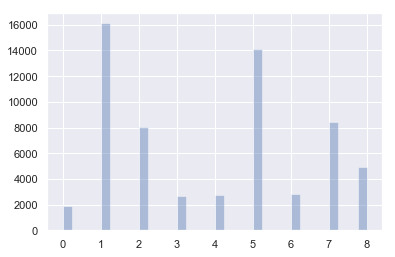

In [7]:
sns.distplot(otto_group[inputer.target].astype("category").cat.codes,kde=False)

In [8]:
otto_group[['id',inputer.target]].groupby([inputer.target]).count()

,id
target,
Class_1,1929
Class_2,16122
Class_3,8004
Class_4,2691
Class_5,2739
Class_6,14135
Class_7,2839
Class_8,8464
Class_9,4955


## Split and creating learner for otto_group

In [ ]:
splitter = Splitter(ontological_filepath='../ontologies/pre/inputers/split-stratify-shuffle-30.yaml')
train,valid=splitter.transform(otto_group,target=inputer.target)
learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification.sm.yaml',)
learner.train(train,target=inputer.target)
learner.predict(valid,measure=True)
learner.metrics

paso 7.8.2019 09:57:57 INFO Loaded Ontological file:../ontologies/pre/inputers/split-stratify-shuffle-30.yaml 
paso 7.8.2019 09:57:58 INFO Loaded Ontological file:../ontologies/learners/RandomForestClassification.sm.yaml 
paso 7.8.2019 09:57:58 INFO learner: RandomForest with kwargs {'n_estimators': 100, 'n_jobs': -1, 'criterion': 'gini'}
paso 7.8.2019 09:57:58 INFO cross_validation: BaggingClassifier
paso 7.8.2019 09:57:58 INFO     cv kwargs: {'n_estimators': 50, 'bootstrap_features': True, 'max_samples': 0.9, 'max_features': 1.0}


In [ ]:
learner.wrong_predicted_class

an when we class balance ``train`` dataset by using ``Augment_by_Class``? Yes, by setting ``ratio = 0.0``.

## Class balance otto_group

In [ ]:
ratio = 0.0
augmenter = Augment_by_Class(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
augment = augmenter.transform(train,inputer.target,ratio,replace=True)
augment.shape

In [ ]:
sns.distplot(augment[inputer.target].astype("category").cat.codes,kde=False)

We can use ``Augment_by_Class`` to balance ``otto_group_train``by augmenting by 0%.

In [ ]:
learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification-sm.yaml',target='TypeOf')
learner.train(augment,target=inputer.target)
learner.predict(valid,measure=True)
learner.metrics

In [ ]:
learner.wrong_predicted_class

With balancing are logloss is much smaller (better).  Now we will double the otto_group

## Augmentation ``otto_group`` train and test datasets 

### grinder

In [ ]:
def grinder(N,M,S,input_file):
    score = np.zeros((S,N,M+2), dtype=np.float32)
    scores = {}
    score_names = {0:'logloss'
                  ,1:'f1'}
    ratio = 1.0

    for i in tqdm(range(N)):
        inputer = Inputer(ontological_filepath=input_file)
        flower = inputer.transform(verbose=False)
        splitter = Splitter(ontological_filepath='../ontologies/pre/inputers/split-stratify-shuffle-30.yaml')
        train,test=splitter.transform(flower,verbose=False
                                      ,target=inputer.target
                                      ,random_state=22*(i+1))
        # do not balancee       
        learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification-sm.yaml',target='TypeOf')
        learner.train(train,target=inputer.target,verbose=False
                      ,checkpoint='irisRandomForest2.ckp')  
        learner.predict(test,measure=True)
        score[0,i,0] = learner.metrics[score_names[0]]
        score[1,i,0] = learner.metrics[score_names[1]]
        #Class_Balance
        class_balancer = Class_Balance(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
        train = class_balancer.transform(train,inputer.target,verbose=False)
        learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification-sm.yaml',target='TypeOf')
        learner.train(train,target=inputer.target,verbose=False
                      ,checkpoint='irisRandomForest2.ckp')
        learner.predict(test,measure=True)
        score[0,i,1] = learner.metrics[score_names[0]]
        score[1,i,1] = learner.metrics[score_names[1]]
        #augment
        augment = train
        for j in range(M):
        # 2*1 augmentation
            augmenter = Augment_by_Class(ontological_filepath='../ontologies/pre/cleaners/SMOTE.yaml')
            ratio = 1.0
            targetFeature =  inputer.target
            augment =augmenter.transform(augment,inputer.target,ratio,verbose=False)
            learner = Learner(ontological_filepath='../ontologies/learners/RandomForestClassification-sm.yaml',target='TypeOf')
            learner.train(augment,target=inputer.target,verbose=False
                          ,checkpoint='irisRandomForest2.ckp')
            learner.predict(test,measure=True)
            score[0,i,j+2] = learner.metrics[score_names[0]]
            score[1,i,j+2] = learner.metrics[score_names[1]]
        learner.wrong_predicted_class
    scores[score_names[0]] = score[0,:,:]
    scores[score_names[1]] = score[1,:,:]
    return score_names,scores

In [ ]:
N = 10  #trial
M = 4 # augmentation 2**M
S= 2 #scores to keep
score_names,scores = grinder(N,M,S,'../ontologies/pre/inputers/otto_group.yaml')

In [ ]:
for i in range(N):
    seaborn.lineplot(x=range(M+1) ,y=scores[score_names[0]][i,:])
plt.show()
for i in range(N):
    seaborn.lineplot(x=range(M+1) ,y=scores[score_names[1]][i,:])
plt.show()

The logloss and other metrics are even better. We tripled the size of the dataset while also increasing the accuracy. What happens to a balanced ``otto_group_train`` dataset that is the same size as the original ``otto_group_train`` dataset?

Finally let us use the augmented train dataset and have the learner predict the test set. We will then send the predicted test dataset class probabilities to Kaggle to score.

## Submit our test dataset to Kaggle

In [ ]:
test = inputer.transform(dataset = 'test')
sampleSubmission = inputer.transform(dataset = 'sampleSubmission')
inputer.target,test.shape,sampleSubmission.shape

In [ ]:
submit = pd.concat([sampleSubmission['id']
                    ,pd.DataFrame(learner.predict(test, measure=False)[1]
                                  ,columns=['Class_1', 'Class_2'
                                            , 'Class_3', 'Class_4'
                                            , 'Class_5', 'Class_6'
                                            , 'Class_7', 'Class_8'
                                            , 'Class_9'])]
                   ,axis=1)

submit.to_csv('../data/sub001.csv',index=False) #, compression='gzip'

Our logloss score  on the otto_group test dataset is xxx, which puts us in xxx place. Not bad as we still need to eliminate distracting features, create new features with feature engineering, try different encoding schemes, try different learners, optimize the hyper-parameters of the learners, ensemble stack different learners, etc.

In [ ]:
submit.tail()

## Summary

We have introduced **paso's** input class, ``Inputer``, and the ``Splitter``class to split data into train, valid and test datasets. We also lightly brushed over ontological files that capture the description of the actions we want one of our classes to take. We stated, through casual argument, that ontological file are better than coded keyword arguments. Finally we made a light foray into the use of learners and cross-validation.

We have focused on the major topics of this lesson, ``Class_Balance``and ``Augment_by_Class``. For what maybe the first time published, we saw how to augment class fix-structured data to improve the predictive power of the learner.

Other lessons on **paso** are:
1. [**paso**'s Offering of Logging and Parameter Services for your Python Project](https://github.com/bcottman/paso/blob/master/lessons/lesson_1.ipynb)
1. [**paso**'s Offering of Data Cleaners for your Machine or Deep Learning Projects](https://github.com/bcottman/paso/blob/master/lessons/lesson_2.ipynb)

In the future, we will cover **paso** in more depth with the following lesons:
- Overview of **paso** scalers and handling data outliers.
- Overview of **paso** encoders.
- Overview of **paso** machine learning and deep learning models.
- Using  **paso** on GPUs.
- and yet more…

If you have a service or feature or see a bug, then leave the **paso** project a [note](https://github.com/bcottman/paso/issues).